In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

from keras import Model, Sequential
from keras.layers import Dense, Dropout, Input
from keras.utils import np_utils
from keras.callbacks import LambdaCallback

### Config

In [2]:
# no of samples in the dataset
N = 1000

# train-test-split
test_size = 0.1

# no of iterations for the model
epochs = 50

# boundary if the graph
GRID_X_START = -1.5
GRID_X_END = 1.5
GRID_Y_START = -1.5
GRID_Y_END = 1.5

### Create sample dataset

In [4]:
X, y  = make_circles(n_samples = N, noise = 0.1, factor = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, shuffle = True, random_state = 42)

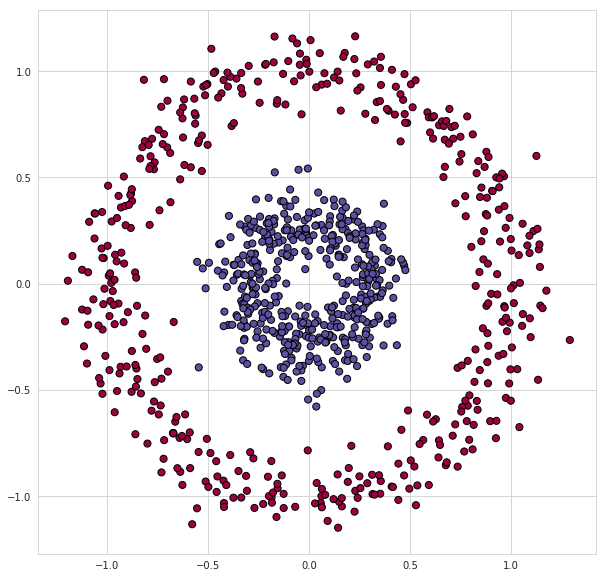

In [6]:
plt.figure(figsize = (10, 10))
sns.set_style('whitegrid')
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train.ravel(), s = 50, cmap = plt.cm.Spectral, edgecolors = 'black')

### Definition of grid boundaries and storage of loss and accuracy history

In [26]:
grid = np.mgrid[GRID_X_START:GRID_X_END:100j, GRID_Y_START:GRID_Y_END:100j]
grid_2d = grid.reshape((2, -1)).T
X, Y = grid
acc_history = []
loss_history = []

### Utility function

In [24]:
# precede the number with zeros, creating a thong of a certain length
def makeIndexOfLength(index, length):
    indexStr = str(index)
    return ('0' * (length - len(indexStr)) + indexStr)

In [31]:
# the auxiliary function forming graphs of classification boundaries and change of accuracy
def save_model_prediction_graph(epoch, logs):
    prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    plt.title('Binary classification with KERAS - epoch: ' + makeIndexOfLength(epoch, 3), fontsize=20)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.contourf(X, Y, prediction_probs.reshape(100, 100), alpha = 0.7, cmap=cm.Spectral)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black')
    plt.savefig("keras" + makeIndexOfLength(epoch, 3) + ".png")
    plt.close()
    
    acc_history.append(logs['acc'])
    loss_history.append(logs['loss'])
    plt.figure(figsize=(12,8))
    sns.set_style("whitegrid")
    plt.plot(acc_history)
    plt.plot(loss_history)
    plt.title('Model accuracy and loss - epoch: ' + makeIndexOfLength(epoch, 3), fontsize=20)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.xlim([0, epochs])
    plt.legend(['accuracy', 'loss'], loc='upper left')
    plt.savefig("loss_acc_" + makeIndexOfLength(epoch, 3) + ".jpeg")
    plt.close()

### Model

In [19]:
# Creating a KERAS model
model = Sequential()
model.add(Dense(4, input_dim=2,activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
# Adding callback functions that they will run in every epoch
testmodelcb = LambdaCallback(on_epoch_end = save_model_prediction_graph)

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs = epochs, verbose = 0, callbacks = [testmodelcb])
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.010006918031722307
Test accuracy: 1.0


Now all you need to do is enter OUTPUT_DIR and use ImageMagick to create a final gift with one command.

```bash
convert -delay 10 -loop 0 *.png keras_class_boundaries.gif
```

In [35]:
!convert -delay 10 -loop 0 *.png keras_class_coundaries.gif

In [36]:
!convert -delay 10 -loop 0 *.jpeg keras_class_acc_loss.gif